# 1. Mengumpulkan data
data diambil dari UCI Machine Learning link => https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

* tidak terdapat missing value
* 569 sampel data dan 32 atribut
*Keterangan untuk bagian Class
*B = Benign
*M = Malignant

# 2. Menelaah Data

In [7]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#Load dataset
url = '/content/drive/MyDrive/Dataset Pelatihan/wdbc.data'
df = pd.read_csv(url, header=None)

In [ ]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
#Memberi nama header 
dataset.columns = ["id", "Class", "fitur 1","fitur 2","fitur 3","fitur 4","fitur 5","fitur 6","fitur 7","fitur 8","fitur 9","fitur 10",
               "fitur 11","fitur 12","fitur 13","fitur 14","fitur 15","fitur 16","fitur 17","fitur 18","fitur 19","fitur 20", 
               "fitur 21","fitur 22","fitur 23","fitur 24","fitur 25","fitur 26","fitur 27","fitur 28","fitur 29","fitur 30"]

In [ ]:
dataset.head(10)

,id,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
#Mengubah kelas(kolom  "class") dari Strik ke Unique-Integer
dataset["Class"] = pd.factorize(dataset.Class)[0]

In [ ]:
dataset.head()

,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
0,0,17,10,122,1001,0,0,0,0,0,...,25,17,184,2019,0,0,0,0,0,0
1,0,20,17,132,1326,0,0,0,0,0,...,24,23,158,1956,0,0,0,0,0,0
2,0,19,21,130,1203,0,0,0,0,0,...,23,25,152,1709,0,0,0,0,0,0
3,0,11,20,77,386,0,0,0,0,0,...,14,26,98,567,0,0,0,0,0,0
4,0,20,14,135,1297,0,0,0,0,0,...,22,16,152,1575,0,0,0,0,0,0


In [ ]:
#Menghapus Kolom Id 
dataset = dataset.drop(labels="id", axis=1)

In [ ]:
#Menganalisa tipe dan relasi data
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
#melihat ukuran dataset 
dataset.shape

(569, 31)

In [ ]:
#melihat informasi data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Class     569 non-null    int64  
 1   fitur 1   569 non-null    float64
 2   fitur 2   569 non-null    float64
 3   fitur 3   569 non-null    float64
 4   fitur 4   569 non-null    float64
 5   fitur 5   569 non-null    float64
 6   fitur 6   569 non-null    float64
 7   fitur 7   569 non-null    float64
 8   fitur 8   569 non-null    float64
 9   fitur 9   569 non-null    float64
 10  fitur 10  569 non-null    float64
 11  fitur 11  569 non-null    float64
 12  fitur 12  569 non-null    float64
 13  fitur 13  569 non-null    float64
 14  fitur 14  569 non-null    float64
 15  fitur 15  569 non-null    float64
 16  fitur 16  569 non-null    float64
 17  fitur 17  569 non-null    float64
 18  fitur 18  569 non-null    float64
 19  fitur 19  569 non-null    float64
 20  fitur 20  569 non-null    float6

In [ ]:
#melihat distribusi class (apa saja jenisnya)
dataset["Class"].unique()

array([0, 1])

In [ ]:
#melihat distribusi class (jumlahnya tiap class)
dataset["Class"].value_counts()

1    357
0    212
Name: Class, dtype: int64

Text(0.5, 1.02, 'Distribusi')

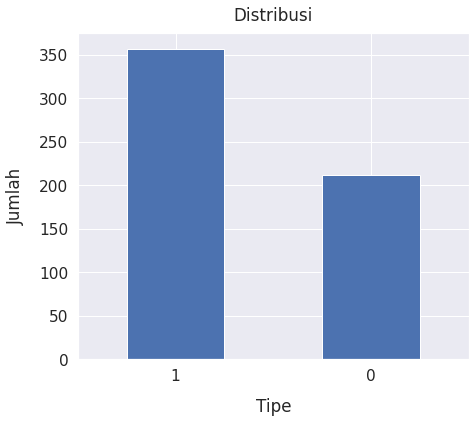

In [ ]:
#Melihat distribusi Class (visualisasi diagram)
sns.set(font_scale=1.4)
dataset["Class"].value_counts().plot(kind="bar", figsize=(7,6), rot = 0)
plt.xlabel("Tipe", labelpad = 14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02)

In [ ]:
#Untuk melihat deskripsi dataset
dataset.describe()

,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Kesimpulan
* Tidak terdapat missing value
* jumlah distribusi class 1 => 357, class 0 => 212

# 3 Validasi Data
terdiri dari : 
* Mengubah fitur yang mempunyai tanda ? menjadi nilai Nan. diubah menggunakan fungsi numpy

In [ ]:
#cek data yang terdapat tanda tanya (?)
dataset.head()

,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#merubah nilai ? menjadi nan menggunakan numpy
dataset.replace("?", np.nan, inplace = True)

In [ ]:
#cek data tanda tanya (?) menjadi Nan
dataset.head()

,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#mengecek apakan dataframe ada nilai yang kosong 
dataset.isnull().values.any()

False

tidak perlu merubah nilai tanda tanya (?) menjadi Nan dikarenakan tidak terdapat missing value

# 4. Menentukan Objek Data

# 5 Membersikan Data
Strategi pembersihan data: 
* memperbaiki nilai yang hilang
* menghapus data duplikat
* cek fitur bernilai konstan

In [ ]:
#melihat presentase dari nilai yang kosong 
dataset.loc[:, list(dataset.loc[:, dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

Series([], dtype: float64)

In [ ]:
#melihat ukuran data 
dataset.shape

(569, 31)

In [ ]:
#Menghapus data duplikat
dataset = dataset.drop_duplicates()
dataset.shape

(569, 31)

# Tidak ada data yang sama

In [ ]:
#Menghapus fitur bernilai konstan 
dataset = dataset.loc[:, dataset.apply(pd.Series.nunique) !=1]
dataset.shape

(569, 31)

tidak ada fitur bernilai konstan

# 6. Merekonstruksi Data
Terdiri dari:
* Representase fitur dan merubah tipenya
* membagi data training dan testing
* Membandingkan data original, Data Normalisasi, Data Original PCA, Data Normalisasi PCA

In [ ]:
#Mengecek Representasi Fitur 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Class     569 non-null    int64  
 1   fitur 1   569 non-null    float64
 2   fitur 2   569 non-null    float64
 3   fitur 3   569 non-null    float64
 4   fitur 4   569 non-null    float64
 5   fitur 5   569 non-null    float64
 6   fitur 6   569 non-null    float64
 7   fitur 7   569 non-null    float64
 8   fitur 8   569 non-null    float64
 9   fitur 9   569 non-null    float64
 10  fitur 10  569 non-null    float64
 11  fitur 11  569 non-null    float64
 12  fitur 12  569 non-null    float64
 13  fitur 13  569 non-null    float64
 14  fitur 14  569 non-null    float64
 15  fitur 15  569 non-null    float64
 16  fitur 16  569 non-null    float64
 17  fitur 17  569 non-null    float64
 18  fitur 18  569 non-null    float64
 19  fitur 19  569 non-null    float64
 20  fitur 20  569 non-null    float6

In [ ]:
#Mengubah yang tipe float64 menjadi int 64
dataset = dataset.astype("int64")

In [ ]:
#Cek kembali representasi fitur
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Class     569 non-null    int64
 1   fitur 1   569 non-null    int64
 2   fitur 2   569 non-null    int64
 3   fitur 3   569 non-null    int64
 4   fitur 4   569 non-null    int64
 5   fitur 5   569 non-null    int64
 6   fitur 6   569 non-null    int64
 7   fitur 7   569 non-null    int64
 8   fitur 8   569 non-null    int64
 9   fitur 9   569 non-null    int64
 10  fitur 10  569 non-null    int64
 11  fitur 11  569 non-null    int64
 12  fitur 12  569 non-null    int64
 13  fitur 13  569 non-null    int64
 14  fitur 14  569 non-null    int64
 15  fitur 15  569 non-null    int64
 16  fitur 16  569 non-null    int64
 17  fitur 17  569 non-null    int64
 18  fitur 18  569 non-null    int64
 19  fitur 19  569 non-null    int64
 20  fitur 20  569 non-null    int64
 21  fitur 21  569 non-null    int64
 22  fi

In [ ]:
#Membagi Training dan Testing
X = dataset.iloc[:, 1: 31]
y = dataset["Class"]

In [ ]:
#Menampilkan X
X.head()

,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
0,17,10,122,1001,0,0,0,0,0,0,...,25,17,184,2019,0,0,0,0,0,0
1,20,17,132,1326,0,0,0,0,0,0,...,24,23,158,1956,0,0,0,0,0,0
2,19,21,130,1203,0,0,0,0,0,0,...,23,25,152,1709,0,0,0,0,0,0
3,11,20,77,386,0,0,0,0,0,0,...,14,26,98,567,0,0,0,0,0,0
4,20,14,135,1297,0,0,0,0,0,0,...,22,16,152,1575,0,0,0,0,0,0


In [ ]:
#Menampilkan y 
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Data Original

In [ ]:
#Membagi data menjadi training = 70% dan testing 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)

#Menampilkan data
X_train.head()

,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
479,16,19,109,815,0,0,0,0,0,0,...,17,23,122,939,0,0,0,0,0,0
209,15,12,98,725,0,0,0,0,0,0,...,17,15,113,932,0,0,0,0,0,0
408,17,20,117,991,0,0,0,0,0,0,...,21,25,138,1349,0,0,0,0,0,0
522,11,19,71,388,0,0,0,0,0,0,...,11,26,76,435,0,0,0,0,0,0
372,21,15,141,1386,0,0,0,0,0,0,...,22,21,152,1535,0,0,0,0,0,0


# Data Normalisasi 

In [ ]:
#Normalisasi menggunakan StandardScaller
X_norm = StandardScaler().fit_transform(X)

#Melihat hasil normalisasi dengan StandardScaller
X_norm

array([[ 0.94386022, -2.03399455,  1.25568159, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.78608154, -0.41339037,  1.66717892, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.5053411 ,  0.51266916,  1.58487946, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66311978,  2.13327334,  0.67958532, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.78608154,  2.36478822,  1.99637679, ...,  0.        ,
         0.        ,  0.        ],
       [-1.86354419,  1.20721381, -1.83054843, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size = 0.3, random_state = 2022)

# Data Original PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("heads of Original_PCA:", ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained Variance Ration:", var_ratio)
sv = pca.singular_values_
print(" \n Singular Values:", sv)

heads of Original_PCA:             0           1          2          3          4         5   \
0  1160.602895 -293.844704  48.666262  -8.359129  31.692206  1.468400   
1  1269.596929   15.706193 -34.946579  18.305321  -4.702449  0.128220   
2   996.321697   39.297662  -1.313525   4.034629  -0.460575 -3.064569   
3  -407.356242  -66.936828   8.995811 -11.454097   6.822648  1.224625   
4   930.865863  189.481326   1.355395   8.309019   7.857020  0.805132   

         6         7         8         9   ...            20            21  \
0  0.833640 -0.169769  0.866535 -0.003318  ...  1.231194e-30  3.332300e-31   
1  0.127442  0.253016 -0.163298 -0.252434  ... -3.732441e-31 -4.014484e-32   
2 -1.016020 -0.438279 -0.082807 -0.341658  ...  6.204505e-31  5.141426e-32   
3 -1.318784  0.172673 -0.152319  0.248282  ...  6.869347e-31 -6.480836e-32   
4 -0.538305  0.205175  0.044121 -0.258153  ...  7.340714e-31  6.948218e-32   

             22            23            24            25            

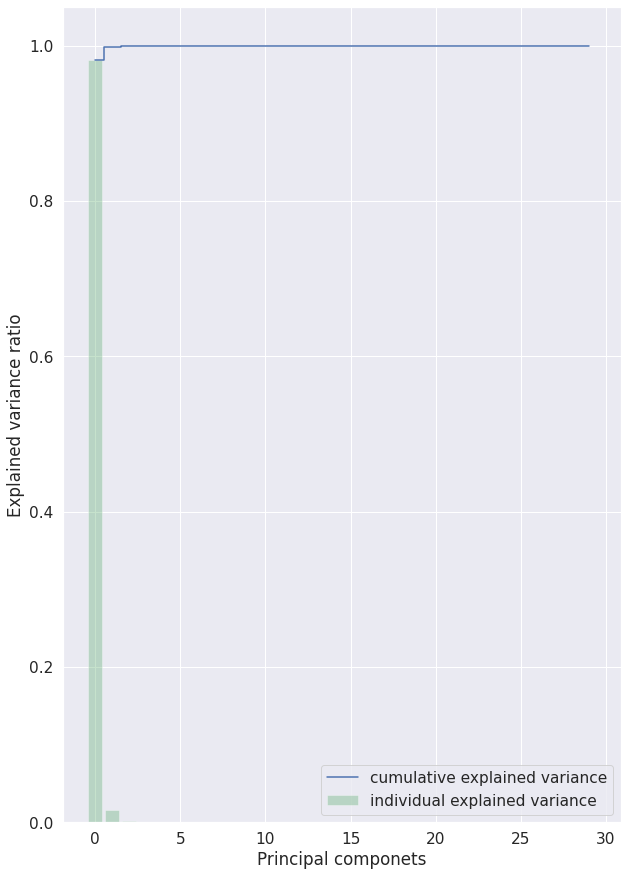

Cumulative explained ratio: [0.98204405 0.99821971 0.99977699 0.99989856 0.99998669 0.99999361
 0.99999787 0.99999891 0.99999939 0.99999975 0.99999995 0.99999998
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
#Visualisasi Data original PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize = (10, 15))
plt.bar(range(len(var_ratio)), 
        var_ratio, 
        alpha = 0.3333, 
        align="center", 
        label = "individual explained variance", 
        color = "g")
plt.step(range(len(cum_var_ratio)), 
         cum_var_ratio, 
         where="mid", 
         label = "cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal componets")
plt.legend(loc="best")
plt.show()

print("Cumulative explained ratio:", cum_var_ratio)

In [ ]:
# Dipilih 18 PC 
pca = PCA(n_components = 18, random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data = ori_pca_array, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", "PC17", "PC18"])


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(ori_pca, y, test_size = 0.3, random_state = 2022)

# Data Normalisasi PCA

In [ ]:
pca = PCA(random_state = 2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of iris_pca:", norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained variance ration:", var_ratio)
sv = pca.singular_values_
print("\n Singular VALUES:", sv)


Heads of iris_pca:          0         1         2         3         4         5         6   \
0  5.240674 -3.625189  1.235113  3.120296 -1.095746  0.004666 -0.735841   
1  3.804857 -1.554495  0.674565 -1.651890  0.517908  0.044110 -0.130101   
2  3.743125 -0.815073  0.366502 -1.224583 -0.028545  0.008846  0.617983   
3 -1.115482  0.636785 -0.397237  0.543206 -0.017164 -0.046619  0.435032   
4  3.535319 -2.594306  0.964744 -0.663901  1.050415  0.090124  0.696737   

         7         8         9   ...            20            21  \
0  1.164881 -0.865540 -0.217587  ...  9.202147e-31 -2.217533e-32   
1  0.049513  0.325400 -0.113211  ... -5.447655e-31 -1.489207e-33   
2 -0.216352  0.353981 -0.092928  ... -8.483341e-32  1.869889e-32   
3  0.217569 -0.362283 -0.178374  ... -7.271403e-31 -2.306884e-33   
4 -0.434304  0.052844  0.174396  ... -1.071199e-30  4.085906e-33   

             22            23            24            25            26   27  \
0 -1.519213e-32 -3.222537e-32 -1.275074e-

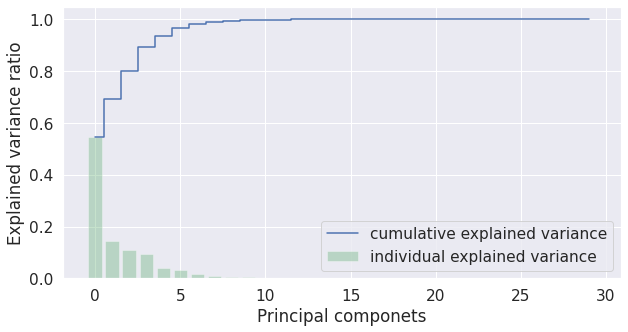

Cumulative explained ratio: [0.54749642 0.6931724  0.8009495  0.89405024 0.93530521 0.96553607
 0.98085094 0.98947978 0.99456924 0.99803832 0.99908303 0.99958725
 0.99987605 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
# Visualisasi Data Normalisasi PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize = (10, 5))
plt.bar(range(len(var_ratio)), 
        var_ratio, 
        alpha = 0.3333, 
        align = "center", 
        label = "individual explained variance", 
        color = "g")
plt.step(range(len(cum_var_ratio)), 
         cum_var_ratio,
         where = "mid", 
         label = "cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal componets")
plt.legend(loc="best")
plt.show()

print("Cumulative explained ratio:", cum_var_ratio)

In [ ]:
# Dipilih 18 PC 
pca = PCA(n_components = 18, random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data = ori_pca_array, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", "PC17", "PC18"])

X_train_norm_pca, X_test_norm_pca, y_train_norm_pca, y_test_norm_pca = train_test_split(norm_pca, y, test_size = 0.3, random_state = 2022)

# 7. Menentukan Label Data

# 8. Membangun Model
* Teknik Pemodelan yang dipakai:
** Menggunakan Decision Tree
** Paramater yang dipakai: ([criterion: gini, entropy], [max_depth], [min sample split], [min sample leaf].

* Skenario Pengujian
** Menggunakan akurasi, presisi dan recall
** Pengujian menggunakan data original
** Pengujian menggunakan data yang sudah dinormalisasi
** Pengujian menggunakan data yang sudah dinormalisasi dan diberikan PCA


# Decision Tree

In [ ]:
parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,101,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [2022]
}

# Pemodelan dengan decision tree

In [ ]:
#Pemodelan dengan Decision Tree
classifier_dt_pipeline = Pipeline([
    ('model',DecisionTreeClassifier()),
    ])

# Pemodelan dengan Data Original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

ori_classifier_dt.fit(X_train,y_train.ravel())

ori_classifier_dt.best_estimator_
Pipeline(steps=[('model', DecisionTreeClassifier(max_depth=1, random_state=2022))])

for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 11
model__min_samples_split: 2
model__random_state: 2022


# Pemodelan Decision Tree dengan Data Normalisasi

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)
norm_classifier_dt.fit(X_train_norm,y_train_norm.ravel())
norm_classifier_dt.best_estimator_
Pipeline(steps=[('model',
 DecisionTreeClassifier(max_depth=1, random_state=2022))])
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 11
model__min_samples_split: 2
model__random_state: 2022


# Pemodelan Decision Tree dengan Data Original tapi diberikan PCA

In [ ]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)
ori_pca_classifier_dt.fit(X_train_pca,y_train_pca.ravel())
ori_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
 DecisionTreeClassifier(max_depth=1, random_state=2022))])
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 3
model__min_samples_leaf: 9
model__min_samples_split: 2
model__random_state: 2022


#Pemodelan Decision Tree dengan Data Normalisasi tapi diberikan PCA

In [ ]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)
norm_pca_classifier_dt.fit(X_train_norm_pca,y_train_norm_pca.ravel())

norm_pca_classifier_dt.best_estimator_
Pipeline(steps=[('model',
 DecisionTreeClassifier(max_depth=3, random_state=2022))])
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 5
model__min_samples_leaf: 3
model__min_samples_split: 7
model__random_state: 2022


# 9 Mengevaluasi Hasil Pemodelan

# Evaluasi Dengan Data Original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)
ori_accuracy_dt_train = accuracy_score(y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)
ori_precision_dt_train = precision_score(y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)
ori_recall_dt_train = recall_score(y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)
ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)
ori_accuracy_dt_test = accuracy_score(y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)
ori_precision_dt_test = precision_score(y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)
ori_recall_dt_test = recall_score(y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.9597989949748744
Precision pada training set:  0.9597989949748744
Recall pada training set:  0.9597989949748744
Akurasi pada test set:  0.9181286549707602
Precision pada test set:  0.9181286549707602
Recall pada test set:  0.9181286549707602


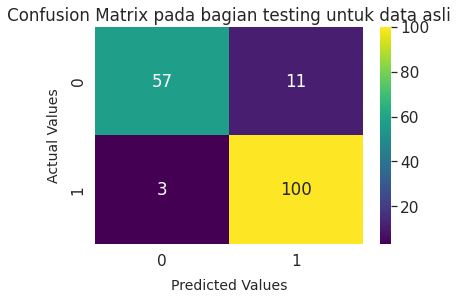

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Evaluasi dengan Data Normalisasi

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)
norm_accuracy_dt_train = accuracy_score(y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)
norm_precision_dt_train = precision_score(y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)
norm_recall_dt_train = recall_score(y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)
norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)
norm_accuracy_dt_test = accuracy_score(y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)
norm_precision_dt_test = precision_score(y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)
norm_recall_dt_test = recall_score(y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.9597989949748744
Precision pada training set:  0.9597989949748744
Recall pada training set:  0.9597989949748744
Akurasi pada test set:  0.9181286549707602
Precision pada test set:  0.9181286549707602
Recall pada test set:  0.9181286549707602


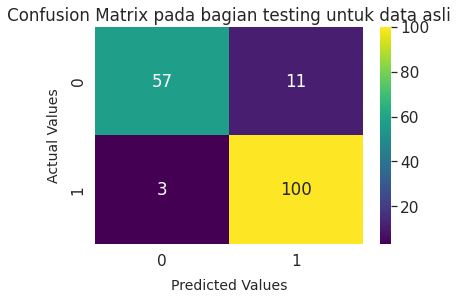

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Evaluasi PCA dengan Data Original

In [ ]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)
ori_pca_accuracy_dt_train = accuracy_score(y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)
ori_pca_precision_dt_train = precision_score(y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)
ori_pca_recall_dt_train = recall_score(y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)
ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)
ori_pca_accuracy_dt_test = accuracy_score(y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)
ori_pca_precision_dt_test = precision_score(y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)
ori_pca_recall_dt_test = recall_score(y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.9597989949748744
Precision pada training set:  0.9597989949748744
Recall pada training set:  0.9597989949748744
Akurasi pada test set:  0.9181286549707602
Precision pada test set:  0.9181286549707602
Recall pada test set:  0.9181286549707602


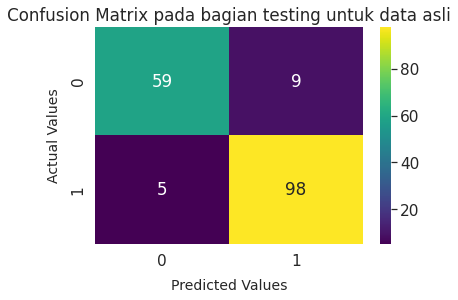

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Evaluasi Data Normalisasi dengan PCA

In [ ]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)
norm_pca_accuracy_dt_train = accuracy_score(y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)
norm_pca_precision_dt_train = precision_score(y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)
norm_pca_recall_dt_train = recall_score(y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)
norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)
norm_pca_accuracy_dt_test = accuracy_score(y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)
norm_pca_precision_dt_test = precision_score(y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)
norm_pca_recall_dt_test = recall_score(y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.9773869346733668
Precision pada training set:  0.9773869346733668
Recall pada training set:  0.9773869346733668
Akurasi pada test set:  0.9239766081871345
Precision pada test set:  0.9239766081871345
Recall pada test set:  0.9239766081871345


# 10 Melakukan Proses Review Pemodelan

In [ ]:
models = [
          ('Decision Tree Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Decision Tree Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
          ('Decision Tree PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),
          ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),
]


In [ ]:
# Melakukan perbandingan hasil training akurasi dan test akurasi dengan 4 model
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree Data Original,0.959799,0.918129
1,Decision Tree Data Normalisasi,0.959799,0.918129
2,Decision Tree PCA Data Original,0.959799,0.918129
3,Decision Tree PCA Data Normalisasi,0.977387,0.923977


In [ ]:
models_comparison = [
('Decision Tree Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
('Decision Tree Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
('Decision Tree PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
]

In [ ]:
# Melakukan perbandingan hasil Akurasi, Presisi dan Recall pada data Testing dengan 4 model
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree Data Original,0.918129,0.918129,0.918129
1,Decision Tree Data Normalisasi,0.918129,0.918129,0.918129
2,Decision Tree PCA Data Original,0.918129,0.918129,0.918129
3,Decision Tree PCA Data Normalisasi,0.923977,0.923977,0.923977


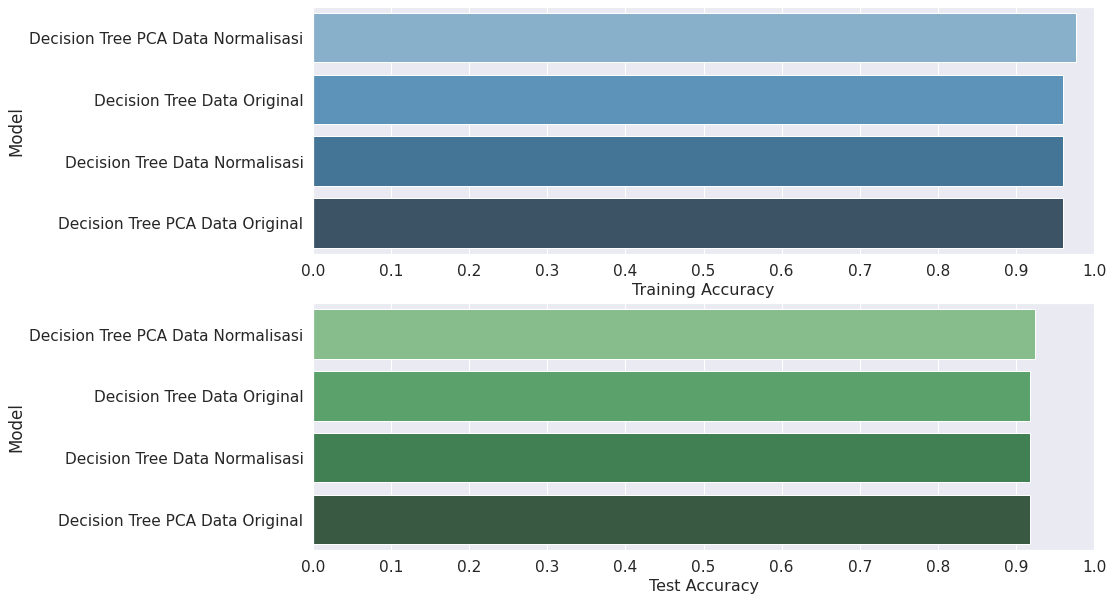

In [ ]:
# Visualisasi Perbandingan 4 model dengan Seaborn
f, axes = plt.subplots(2,1, figsize=(14,10))
predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()


# Kesimpulan: 
* Model terbaik dari dataset Breast Cancer adalah menggunakan Decision Tree PCA Data Normalisasi dengan nilai akurasi tertinggi pada Data training sebesar 97, 73% dan akurasi tertinggi pada Data Testing sebesar 92,39% 